## Instituto Tecnologico de Costa Rica
## Escuela de Computacion 
## Curso: Inteligencia Artificial
## Profesor: Luis Alexander Calvo Valverde
## Estudiantes: 
   - Josué Andrey Rojas Vega 2019042245
   - Andrew José Gutierrez Castro 2019068322

# SVD en una imagen 


La ténica del SVD puede ser utilizada para la compresión de imágenes. Por ejemplo, una imagen **[1]** de $m×n$ pixels en escala de grises puede ser representada como una matriz $A \in R^{m×n}$ cuyos elementos $a_{ij}$ representan la intensidad del pixel $(i, j)$. En particular, una imagen contiene mucha información redundante, es decir, que puede ser eliminada sin que el efecto visual sea notable. 

Se podría sustituir la matriz $A$ por otra matriz $B$ de rango menor. 

Consideremos:

Teorema: Sean $\sigma_{1} \geq \sigma_{2} \geq \cdots \geq \sigma_{r} > 0 $ valores singulares no  nulos de $A \in C^{m×n}$. Entonces para cada $k < r$, la distancia desde $A$ al conjunto de matrices de rango $k$ en la norma $\left\Vert \cdot \right\Vert _{2} $ es:

$$\sigma_{k+1} = \min\limits_{rank(B)=k} \left\Vert A - B \right\Vert _{2}$$

Por tanto, si $A = UDV^H $ es la descomposición en valores singulares de $A$, la matriz de rango $k$ de mejor aproximación a $A$ es:

$$B = U 
\begin{bmatrix} D  &  0      \\
                0  &  0
\end{bmatrix} V^T , S = diag(\sigma_1, \sigma_2, \cdots , \sigma_k)$$

Si $U_k$ y $V_k$ son las matrices compuestas por las primeras $k$ columnas de $U$ y $V$,  respectivamente, entonces se puede decir que (fórmula **f_1**):

$$B = U_k D V_{k}^{T}$$

logrando codificar la imagen aproximada por medio de matrices de menor tamaño.


**[1]** Texto base: https://w3.ual.es/~andrei/Practicas/practica14.pdf

### Objetivo

Implementar un programa en python usando numpy y librerias para manejo de imagenes para calcular el SVD y aplicar modificaciones en la imagen dada

Tareas a realizar:

1. Importacion de librerias necesarias

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Carga de la imagen dada y la pasamos a escala de grises para reducir los vectores de cada pixel a un solo valor

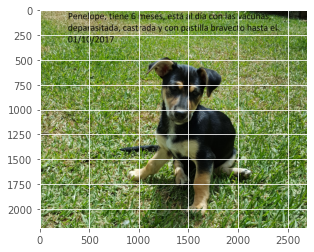

In [7]:
nombreImagen= "imagenUsar"
plt.style.use('ggplot')

image = Image.open(nombreImagen+'.jpg')

plt.imshow(image)
plt.show()

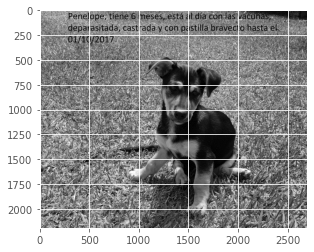

In [8]:
image = image.convert("1")

plt.imshow(image)
plt.show()

3. Carga de la matriz dada la imagen

In [9]:
A = np.asarray(image) # generamos la matriz de pixeles (rgb) usando la imagen
original_shape = A.shape
print(original_shape) # forma de la matriz resultante

(2193, 2697)


In [10]:
A[0, :10] # mostrando los primeros 10 valores de la fila 0 de la matriz de la imagen

array([ True, False,  True, False,  True, False, False, False,  True,
       False])

4. Obtener los vectores resultantes del calculo del SVD usando numpy

In [11]:
""" 
Se realiza el proceso de descomposicion de valores singulares con el fin quedarse solo con los
r autovectores unitarios asociados a los r valores singulares no nulos.

Obteniendo U_r, V_r, S_r siendo matriz diagonal

ref: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
"""

u, s, vh = np.linalg.svd(A, full_matrices=False)
u.shape, s.shape, vh.shape

((2193, 2193), (2193,), (2193, 2697))

5. Calculamos la varianza para saber que tan comprimible es la informacion

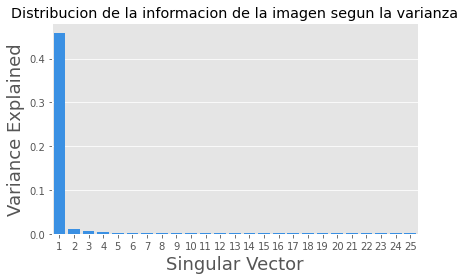

In [12]:
"""
Como parte del proceso para la compresion de la imagen en base a sus componentes
principales, se puede calcular la varianza usando S que nos dice que tanto varia la informacion,
es decir que tanta informacion significativa esta acumulada en los vectores que existen
la imagen
"""

variance = np.round(s**2/np.sum(s**2), decimals=6)

# se procede a generar un grafico que muestra la distribucion
sns.barplot(x=list(range(1, 26)),
            y=variance[0:25], color="dodgerblue")
 
plt.title('Distribucion de la informacion de la imagen segun la varianza')
plt.xlabel('Singular Vector', fontsize=18)
plt.ylabel('Variance Explained', fontsize=18)
plt.tight_layout()
plt.show()

6. Mostramos las diferentes versiones de la imagen usando las cantidades de componentes dados

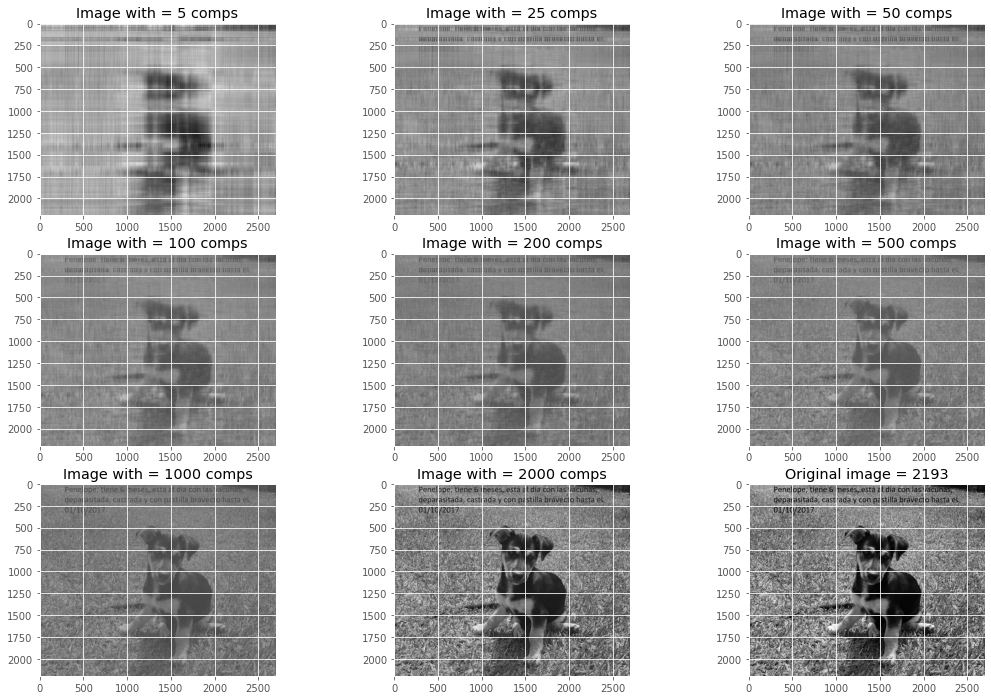

In [13]:
"""
En base a los componentes dados, se procede a tomar en cuenta cada uno de ellos como un parametro para
limitar la cantidad de componentes principales que se tomaran para representar a la imagen, es decir
tomando en cuenta los n vectores mas significativos, siendo n perteneciente a comps.
"""

comps = [5, 25, 50, 100, 200, 500, 1000, 2000, 2193]
plt.figure(figsize=(18, 12))

# se procede a generar la matriz segun la formula, que nos da la matriz que representa la imagen en funcion de comps_i
for i in range(len(comps)):
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ vh[:comps[i], :]
    plt.subplot(3, 3, i+1),
    plt.imshow(low_rank, cmap='gray')
    plt.title(f'Original image = {comps[i]}' if i == len(comps)-1 else f'Image with = {comps[i]} comps')

7. Cargar la imagen para proceder a trabajar con la imagen a colores

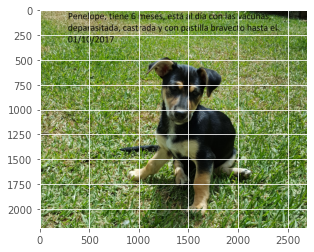

In [14]:
nombreImagen= "imagenUsar"
plt.style.use('ggplot')

image = Image.open(nombreImagen+'.jpg')
plt.imshow(image)
plt.show()

8. Cargar la matriz dada la imagen

In [15]:
A = np.asarray(image) # se carga la matriz de pixeles (rgb) dada la imagen
original_shape = A.shape
print(original_shape) 

(2193, 2697, 3)


Debido a que es necesario tener una matriz de dos dimensiones para realizar el proceso, es necesario reducir la dimensionalidad de la matriz de pixeles por lo
que se nos presentan 2 formas de hacerlo:

9. Método de remodelación: Hacer un reshape de la matriz 

In [16]:
"""
El metodo reshape, como su nombre lo indica, reacomoda los valores de la matriz de forma que se puede cambiar la forma sin perder la informacion
por lo que la imagen se estira ya sea en forma horizontal o vertical formando una imagen diferente a la original en cuanto a forma
"""
B = A.reshape(A.shape[0],A.shape[1]*A.shape[2])
print(B.shape)

(2193, 8091)


10. Método de remodelación: Obtener los vectores resultantes del calculo del SVD usando numpy

In [17]:
# se vuelve a repetir el proceso, ahora con la imagen a colores
# ref: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
uB, sB, vhB = np.linalg.svd(B, full_matrices=False)
uB.shape, sB.shape, vhB.shape

((2193, 2193), (2193,), (2193, 8091))

11. Método de remodelación: Calculamos la varianza para saber que tan comprimible es la informacion

Text(0, 0.5, 'Variance Explained')

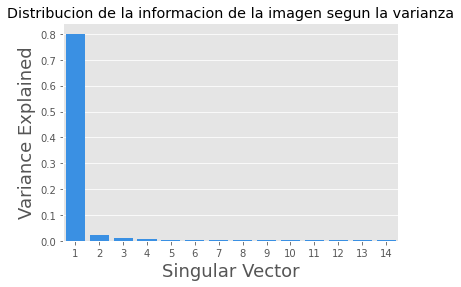

In [18]:
# calculamos la varianza nuevamente para la matriz de la imagen a colores
variance = np.round(sB**2/np.sum(sB**2), decimals=6)

sns.barplot(x=list(range(1, 15)),y=variance[0:14], color="dodgerblue")

plt.title('Distribucion de la informacion de la imagen segun la varianza')
plt.xlabel('Singular Vector', fontsize=18)
plt.ylabel('Variance Explained', fontsize=18)


12. Metodo de remodelacion: Mostramos las diferentes versiones de la imagen usando las cantidades de componentes dados

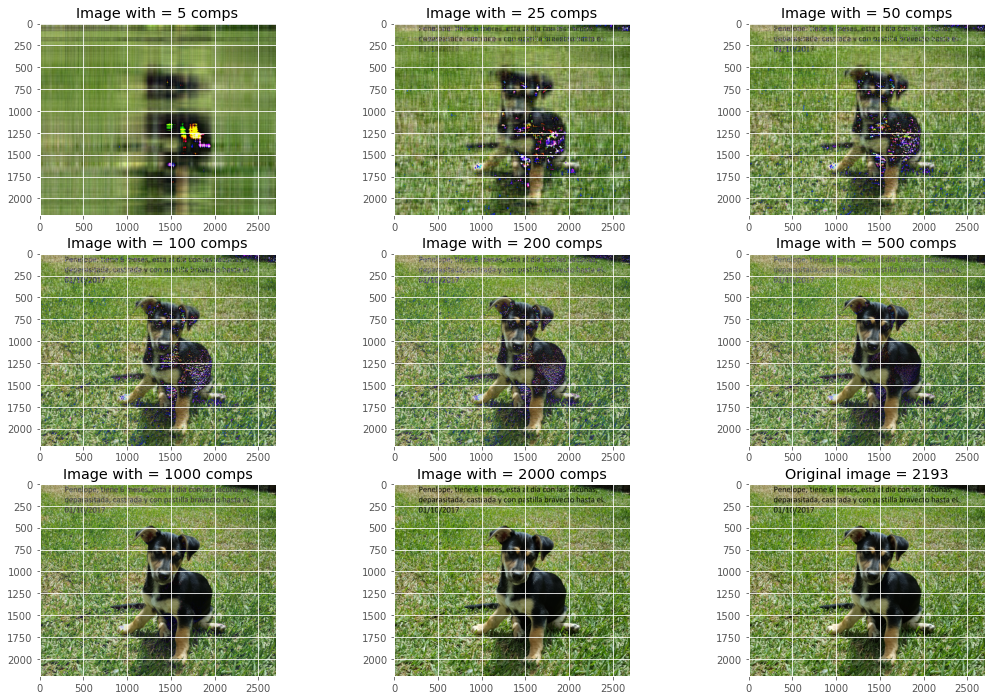

In [19]:
comps = [5, 25, 50, 100, 200, 500, 1000, 2000, 2193]
plt.figure(figsize=(18, 12))

# para cada uno de las cantidades de componentes, se calcula la matriz resultante
for i in range(len(comps)):
    low_rank = uB[:, :comps[i]] @ np.diag(sB[:comps[i]]) @ vhB[:comps[i], :]

    # se reacomoda la matriz de forma que vuelva a tener el mismo tamaño de la original
    low_rank_1 = low_rank.reshape(low_rank.shape[0], low_rank.shape[1]//3,3)

    plt.subplot(3, 3, i+1)

    plt.imshow((low_rank_1).astype(np.uint8))
    plt.title(f'Original image = {comps[i]}' if i == len(comps)-1 else f'Image with = {comps[i]} comps')

13. Metodo de capas: Generacion de las tres matrices para el rojo, verde y azul de la imagen usando la matriz de pixeles de la imagen a color

In [20]:
A_red =   np.array([[ pix[0] for pix in row] for row in A])
A_green = np.array([[ pix[1] for pix in row] for row in A])
A_blue =  np.array([[ pix[2] for pix in row] for row in A])

A_red.shape, A_green.shape, A_blue.shape

((2193, 2697), (2193, 2697), (2193, 2697))

14. Metodo de capas: Proceso de descomposicion de valores singulares para cada una de las matrices RGB

In [21]:
u_0, s_0, vh_0 = np.linalg.svd(A_red, full_matrices=False)
u_1, s_1, vh_1 = np.linalg.svd(A_green, full_matrices=False)
u_2, s_2, vh_2 = np.linalg.svd(A_blue, full_matrices=False)

u_0.shape, u_1.shape, u_2.shape

((2193, 2193), (2193, 2193), (2193, 2193))

15. Metodo de capas: Generacion de la matriz de la imagen resultante

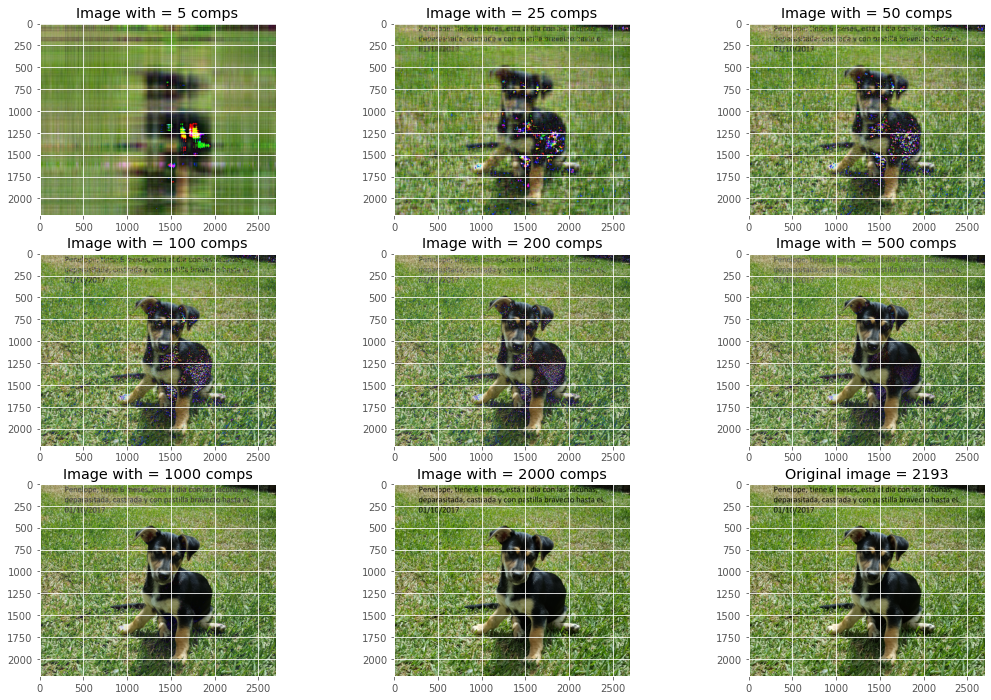

In [22]:
comps = [5, 25, 50, 100, 200, 500, 1000, 2000, 2193]
plt.figure(figsize=(18, 12))

# se procede a generar las imagenes para cada color de la imagen
for i in range(len(comps)):

    low_rank_0 = u_0[:, :comps[i]] @ np.diag(s_0[:comps[i]]) @ vh_0[:comps[i], :]
    low_rank_1 = u_1[:, :comps[i]] @ np.diag(s_1[:comps[i]]) @ vh_1[:comps[i], :]
    low_rank_2 = u_2[:, :comps[i]] @ np.diag(s_2[:comps[i]]) @ vh_2[:comps[i], :]

    # se genera la nueva imagen en base a las matrices resultantes de trabajar los colores por separado
    mtx = np.empty(A.shape, float)
    for x in range(A.shape[0]):
        for y in range(A.shape[1]):
            mtx[x,y] = [low_rank_0[x][y], low_rank_1[x][y], low_rank_2[x][y]]

    plt.subplot(3, 3, i+1)
    plt.imshow((mtx).astype(np.uint8))
    plt.title(f'Original image = {comps[i]}' if i == len(comps)-1 else f'Image with = {comps[i]} comps')